<a href="https://colab.research.google.com/github/Jaahnavi5666/Book-Recommendation-System/blob/main/Book_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation System**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [43]:
#Acquiring the requird dataset
book_ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Product Recommendation System/Books_rating.csv')
book_ratings = book_ratings.drop(['Price','profileName','review/helpfulness','review/summary','review/text'], axis = 1)
book_ratings.rename(columns = {'Id':'BookId', 'User_id':'UserId','review/score':'Rating','review/time':'Timestamp'}, inplace = True)
book_ratings.head()

,BookId,Title,UserId,Rating,Timestamp
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,4.0,940636800
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,1095724800
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,1078790400
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,1090713600
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,1107993600


In [ ]:
# The size of the dataset
book_ratings.shape

(3000000, 4)

## Recommendation System Part 1

In [ ]:
# Accquiring the number of ratings of each Book, and sorting it such that the book with highest number of ratings is on the top
popular_books = pd.DataFrame(book_ratings.groupby('BookId')['Rating'].count())
most_popular = popular_books.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
BookId,
B000IEZE3G,6796
B000ILIJE0,4438
B000GQG7D2,4428
B000GQG5MA,4427
B000NDSX6C,4426
B000NWU3I4,4420
B000PC54NG,4402
B000NWQXBA,4397
B000Q032UY,4373


In [ ]:
# the number of unique books
most_popular.shape

(221998, 1)

<Axes: xlabel='BookId'>

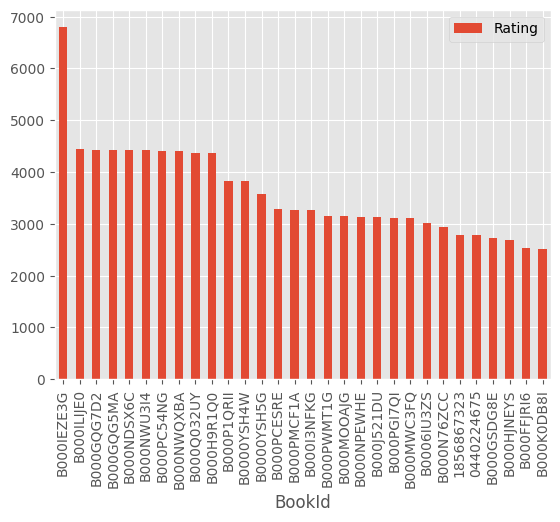

In [ ]:
most_popular.head(30).plot(kind = "bar")

## Recommendation System Part 2

In [ ]:
# Subset of Book Ratings

book_ratings1 = book_ratings.head(10000)

In [ ]:
ratings_utility_matrix = book_ratings1.pivot_table(values='Rating', index='UserId', columns='BookId', fill_value=0)
ratings_utility_matrix.head()

BookId,0007106823,0007128355,0020794207,0026204207,006000486X,0060539453,0060539461,006053947X,0060539488,0060550546,...,B000PHTCGG,B000PL1PL2,B000PVKWH0,B000PXNN4C,B000Q9U9W4,B000QB7MQI,B000QFQ7XS,B000R0GO80,B000RAQAUC,B000UVGLZM
UserId,,,,,,,,,,,,,,,,,,,,,
A01496021AHO2YSV1VTDN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0461265TOJ3VFHJUMY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0697594EQLA004ZRJLI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A08834252VBVVICHT1SE6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0967364SNU9IUOOAERO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ratings_utility_matrix.shape

(7562, 819)

In [ ]:
X = ratings_utility_matrix.T
X.head()

UserId,A01496021AHO2YSV1VTDN,A0461265TOJ3VFHJUMY7,A0697594EQLA004ZRJLI,A08834252VBVVICHT1SE6,A0967364SNU9IUOOAERO,A100NGGXRQF0AQ,A100V1W0C8BWOL,A1012N48J0Z65N,A10169ZRHBRUOS,A101LFK9ZIHMIJ,...,AZTYHKV3MI0YL,AZUOZCBGDO70G,AZUXFFBSF3ZGO,AZV0P2H26RCAM,AZV4JMDVQN1E3,AZWXXTW8OCH7T,AZX7FIOG0MNCU,AZX7JB5VQUDH3,AZXEYDJIWTXOQ,AZY2D4BWP9J33
BookId,,,,,,,,,,,,,,,,,,,,,
0007106823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0007128355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0020794207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0026204207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006000486X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.shape

(819, 7562)

In [ ]:
# Dimensionality reduction using SVD
# users taking most common number of books
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(819, 10)

In [ ]:
# Gives R value among the books, which two books are taken togather
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(819, 819)

In [ ]:
# Randomly chosen a book
X.index[99]

'0425197964'

In [ ]:
i = "0425197964"

book_list = list(X.index)
book_ID = book_list.index(i)
book_ID

99

In [ ]:
# finding the correlation of the previously purchased book with all other books that are bought by similar customers
correlation_book_ID = correlation_matrix[book_ID]
correlation_book_ID.shape

(819,)

In [ ]:
Recommend = list(X.index[correlation_book_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['0060539453',
 '0307338037',
 '0312283989',
 '0373713215',
 '0385306741',
 '0385416776',
 '0441006450',
 '0451198697',
 '050552421X']

## Recommendation System Part 3

In [80]:
book_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Product Recommendation System/books_data.csv')
book_data = book_data.drop(['image','previewLink','publisher','publishedDate','infoLink','ratingsCount'], axis = 1)
book_data.shape

(212404, 4)

In [84]:
books = book_ratings.merge(book_data, on='Title', how='left')
books = books.drop(['UserId','Rating','Timestamp'], axis = 1)
books = books.drop_duplicates()
books.head()

,BookId,Title,description,authors,categories
0,1882931173,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],['Comics & Graphic Novels']
1,0826414346,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography']
10,0829814000,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],['Religion']
14,0595344550,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],['Fiction']
46,0253338352,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [86]:
books = books.dropna()
books.shape

(142814, 5)

In [87]:
books1 = books.head(500)

books1["description"].head(10)

1     Philip Nel takes a fascinating look into the k...
10    This resource includes twelve principles in un...
14    Julia Thomas finds her life spinning out of co...
47    In The Church of Christ: A Biblical Ecclesiolo...
55    The story for children 10 and up of St. Hyacin...
57    Wardell recalls his experience as a foreign st...
60    Counters the Western views and stereotypes of ...
62    Dramatica for Screenwriters by Armando Saldana...
72    Acclaimed teacher and puzzler Evelyn B. Christ...
74    Herb Caen, a popular columnist for the San Fra...
Name: description, dtype: object

In [88]:
# Converting the text in product description into numerical data for analysis
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(books1["description"])
X1

<500x9770 sparse matrix of type '<class 'numpy.float64'>'
	with 24503 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


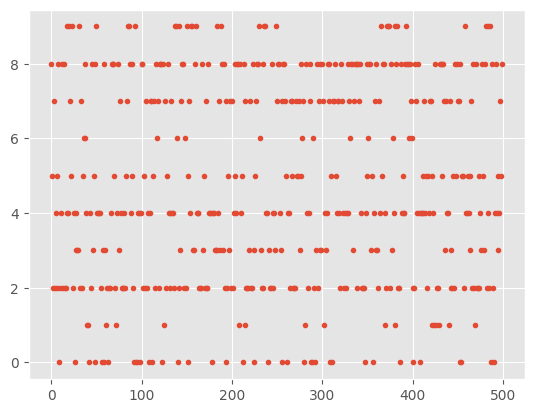

In [89]:
# Fitting K-Means to the dataset
X=X1
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [90]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [91]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 life
 stories
 history
 love
 children
 author
 magic
 written
 new
 story
Cluster 1:
 book
 students
 social
 change
 cultural
 political
 economic
 economics
 history
 meaning
Cluster 2:
 een
 en
 het
 van
 zijn
 haar
 te
 ze
 hij
 dat
Cluster 3:
 guide
 health
 book
 easy
 simple
 latin
 read
 apocrypha
 life
 help
Cluster 4:
 war
 readers
 studies
 book
 events
 body
 shows
 study
 stevens
 work
Cluster 5:
 information
 updated
 world
 new
 maps
 guide
 edition
 advice
 data
 range
Cluster 6:
 lincoln
 award
 author
 right
 winning
 american
 best
 title
 jewish
 tales
Cluster 7:
 finance
 financial
 man
 make
 life
 includes
 book
 designed
 help
 meet
Cluster 8:
 available
 description
 house
 day
 step
 history
 book
 snow
 instructions
 little
Cluster 9:
 men
 work
 women
 century
 gardens
 volume
 classic
 traditional
 john
 collection


In [93]:
def show_recommendations(book):
    Y = vectorizer.transform([book])
    prediction = model.predict(Y)
    print_cluster(prediction[0])

In [94]:
show_recommendations("history")

Cluster 0:
 life
 stories
 history
 love
 children
 author
 magic
 written
 new
 story


In [100]:
show_recommendations("traditional")

Cluster 9:
 men
 work
 women
 century
 gardens
 volume
 classic
 traditional
 john
 collection
